In [1]:
import os
import json
from pathlib import Path
from collections import defaultdict
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import textwrap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_dir = Path('Steps')

In [3]:
STAGE_TYPES = [
    1,
    2,
    3,
    4,
    5,
    6,
    7
]

In [4]:
step_stage_counts = defaultdict(lambda: {stage: 0 for stage in STAGE_TYPES})

In [5]:
for trace_file in data_dir.rglob('analysis.json'):
    try:
        with open(trace_file, 'r') as f:
            trace_data = json.load(f)

        for step_num, step in enumerate(trace_data['steps'], 1):
            step_stage_counts[step_num][step['Stage']] += 1

        
    except json.JSONDecodeError as e:
        print(f"Error reading {trace_file}: {e}")

In [6]:
# def visualize_step_actions(step_action_counts):
#     # Convert the dictionary to a DataFrame for easier manipulation
#     df = pd.DataFrame.from_dict(step_action_counts, orient='index')
    
#     # Rename the columns
#     stage_names = {
#         1: "understand",
#         2: "implement",
#         3: "execute",
#         4: "improve",
#         5: "submit"
#     }
#     df = df.rename(columns=stage_names)
    
#     # Sort by step number
#     df = df.sort_index()
    
#     # Get action types
#     action_types = df.columns
    
#     # Set up the plot
#     fig, ax = plt.subplots(figsize=(14, 8))
    
#     # Define a better color map for actions (using more distinct colors)
#     colors = {
#         "understand": '#3498db',    # Clear Blue
#         "implement": '#e74c3c',     # Bright Red
#         "execute": '#2ecc71',       # Emerald Green
#         "improve": '#9b59b6',       # Purple
#         "submit": '#f1c40f'         # Bright Yellow
#     }
    
#     # Plot stacked bars
#     bottom = np.zeros(len(df))
#     for action in action_types:
#         ax.bar(df.index, df[action], bottom=bottom, label=action, color=colors[action])
#         bottom += df[action].values
    
#     # Add labels and title
#     ax.set_xlabel('Step Number', fontsize=12)
#     ax.set_ylabel('Count', fontsize=12)
#     ax.set_title('Stage Distribution for Each Step', fontsize=14)
    
#     # Add gridlines
#     ax.grid(axis='y', linestyle='--', alpha=0.7)
    
#     # Add legend with better positioning
#     ax.legend(title='Stages', bbox_to_anchor=(1.05, 1), loc='upper left')
    
#     # Adjust layout to ensure legend is visible
#     plt.tight_layout()
    
#     return fig

In [7]:
def visualize_step_actions(step_action_counts):
    # Convert the dictionary to a DataFrame for easier manipulation
    df = pd.DataFrame.from_dict(step_action_counts, orient='index')
    
    # Rename the columns
    stage_names = {
        1: "understanding_exploration",
        2: "baseline_assessment",
        3: "problem_analysis_idea_generation",
        4: "implementation",
        5: "debugging_error_handling",
        6: "experimental_refinement",
        7: "final_evaluation_submission"
    }
    df = df.rename(columns=stage_names)
    
    # Sort by step number
    df = df.sort_index()
    
    # Apply rolling mean to smooth the data
    window_size = 2  # Adjust this value to control smoothing amount
    df_smooth = df.rolling(window=window_size, min_periods=1, center=True).mean()
    
    # Set up the plot with increased size
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Define a color palette
    colors = {
        "understanding_exploration": '#4169E1',          # Royal Blue
        "baseline_assessment": '#98FB98',                # Pale Green
        "problem_analysis_idea_generation": '#DEB887',   # Burlywood
        "implementation": '#20B2AA',                     # Light Sea Green
        "debugging_error_handling": '#9370DB',           # Medium Purple
        "experimental_refinement": '#CD853F',            # Peru
        "final_evaluation_submission": '#FA8072'         # Salmon
    }
    
    # Create stacked area plot with smoothed data
    ax.stackplot(df_smooth.index, 
                [df_smooth[col] for col in stage_names.values()],
                labels=stage_names.values(),
                colors=[colors[stage] for stage in stage_names.values()])
    
    # Add labels and title
    ax.set_xlabel('Step Number', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('Stage Distribution Across Steps', fontsize=14)
    
    # Set y-axis ticks with jumps of 8
    y_max = df.sum(axis=1).max()
    y_ticks = np.arange(0, y_max + 8, 8)
    ax.set_yticks(y_ticks)
    
    # Add gridlines
    ax.grid(True, ls="-", alpha=0.2)
    
    # Add legend inside the plot (upper right corner)
    ax.legend(title='Stages', loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

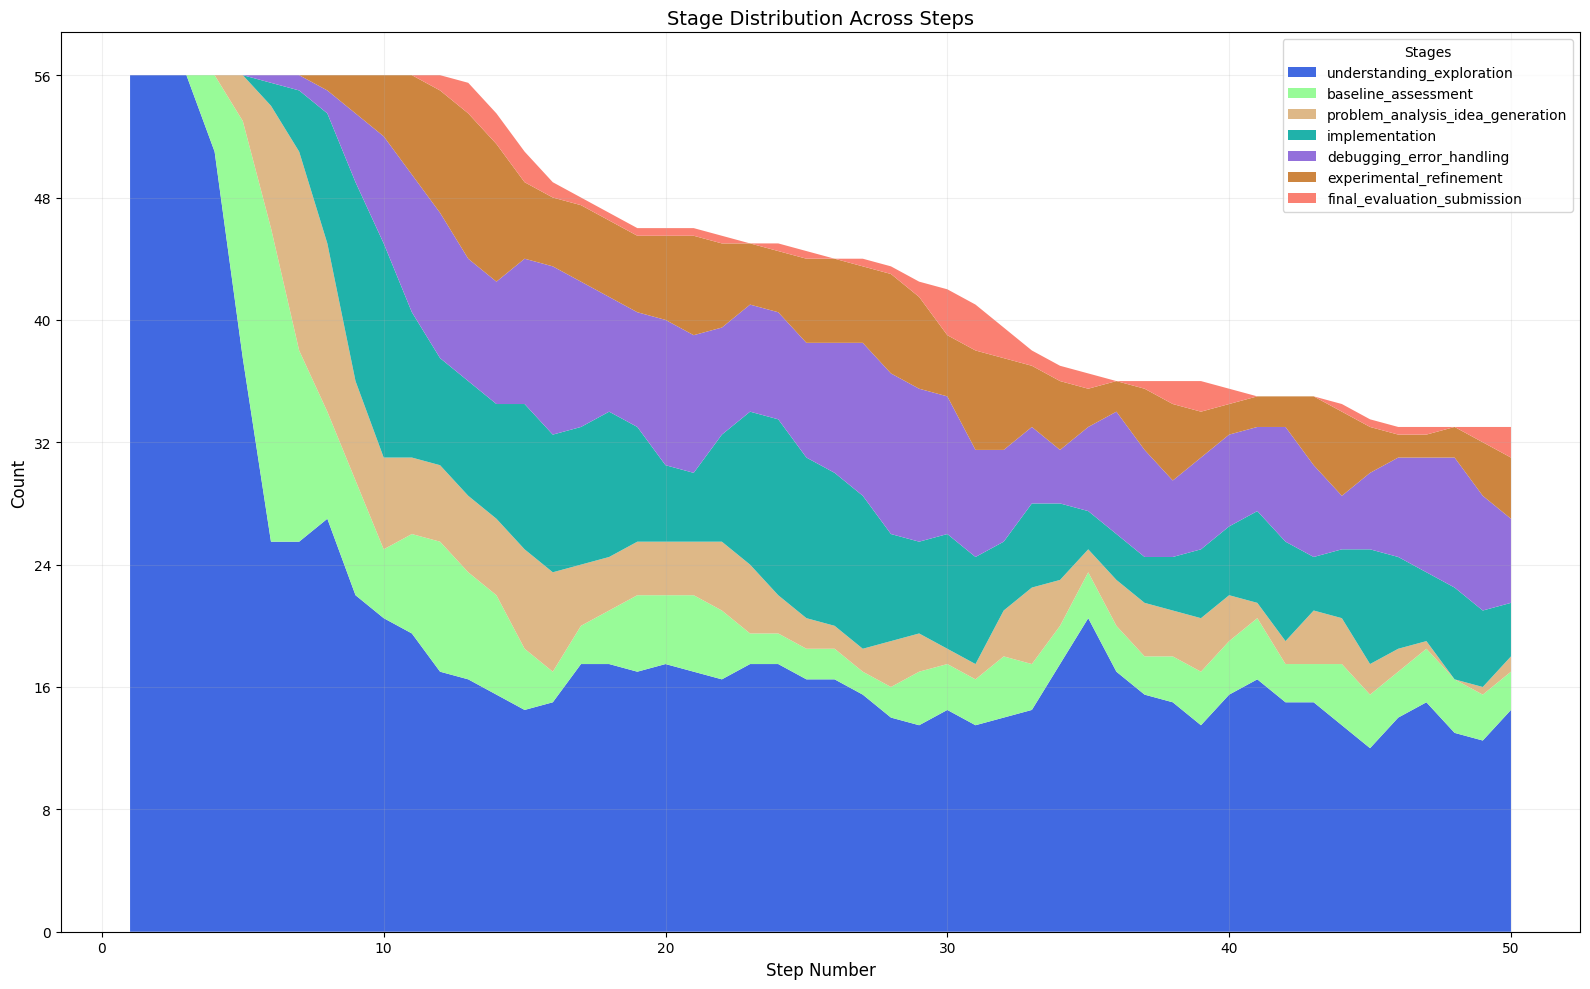

In [11]:
os.makedirs('Stage_per_step', exist_ok=True)
fig = visualize_step_actions(step_stage_counts)
fig.savefig('Stage_per_step/Stage_distribution.pdf', dpi=300, bbox_inches='tight')